Regresión Lineal 
Eduardo Andres Enciso Gomez
Curso: Análisis de datos 
Codigo 202016908_84
 Unad

Comencemos por importar las librerías que utilizaremos:

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Leemos el archivo csv y lo cargamos como un dataset de Pandas. Y vemos su tamaño

In [2]:
#cargamos los datos de entrada
data = pd.read_csv('C:/Users/Administrator/Downloads/car details v4.csv')
#veamos cuantas dimensiones y registros contiene
data.shape

(2059, 20)

Nos devuelve (2059,20)

Veamos esas primeras filas:

In [3]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


si hay campos valores (nulos)  se eliminan

Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [4]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


Aqui vemos que la media de palabras en los precios  es de 1702992 El precio más corto es 490000 y el más extenso 3500000. Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de precios.

Hacemos una visualización en general de los datos de entrada:


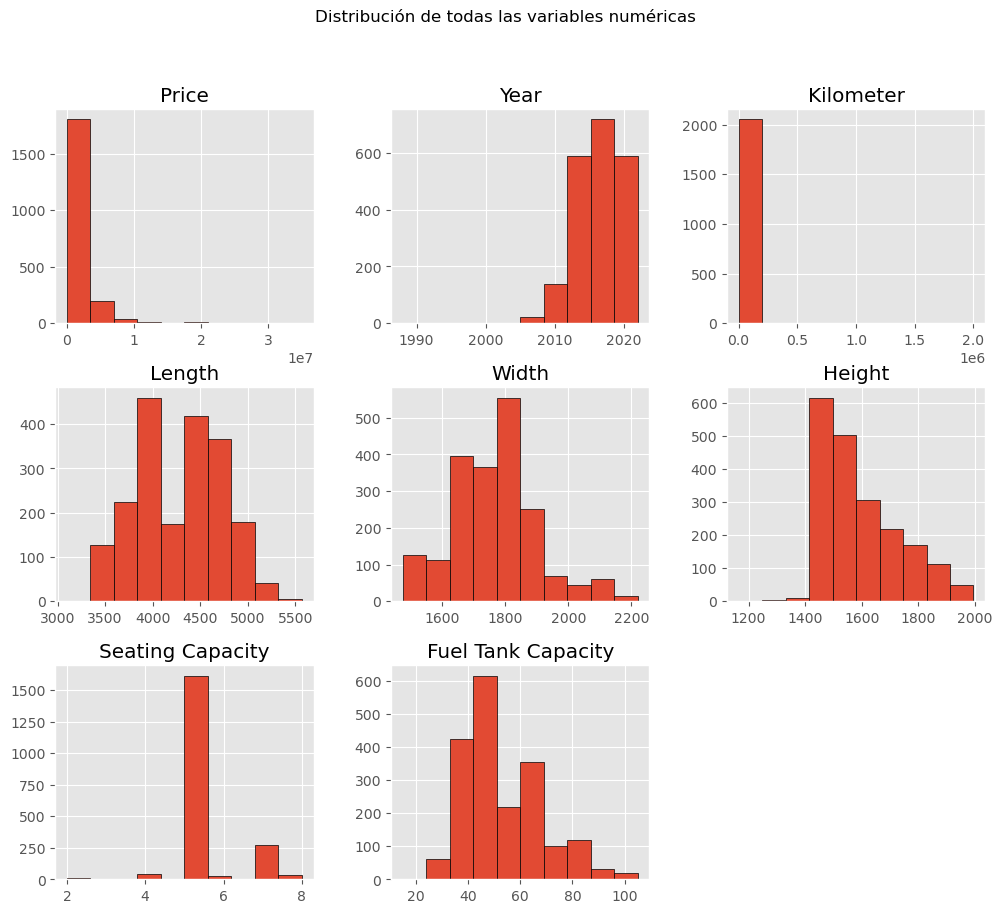

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Verifica que data es un DataFrame (opcional)
if not isinstance(data, pd.DataFrame):
    data = pd.DataFrame(data)

# Crear histogramas para todas las columnas numéricas
data.hist(figsize=(12, 10), bins=10, edgecolor='black')

# Mostrar los gráficos
plt.suptitle("Distribución de todas las variables numéricas")
plt.show()


En estas gráficas vemos entre qué valores se concentran la mayoría de registros.

Vamos a filtrar los datos de cantidad de precios para quedarnos con los registros con menos de 3500000 precios y también con los que tengan Cantidad de compartidos menos a 800.000. Lo gratificaremos pintando en azul los puntos con menos de 1702992  precios (la media) y en naranja los que tengan más.

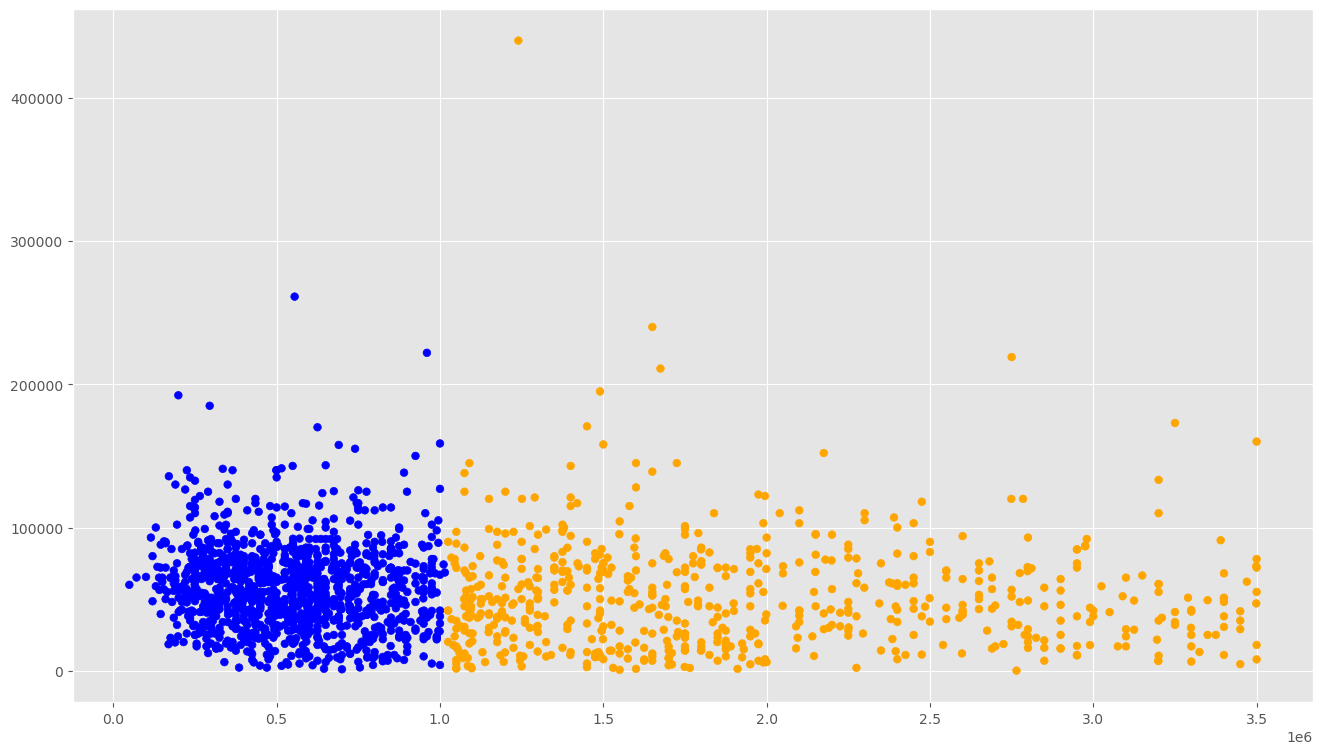

In [7]:
# Filtrar datos dentro del rango específico
filtered_data = data[(data['Price'] <= 3_500_000) & (data['Kilometer'] <= 800_000)]

# Definir colores y tamaños
colores = ['orange', 'blue']
tamanios = [30, 60]

# Extraer valores
f1 = filtered_data['Price'].values
f2 = filtered_data['Kilometer'].values

# Asignar colores según la media de Price
asignar = []
for index, row in filtered_data.iterrows():
    if row['Price'] > filtered_data['Price'].mean():  
        asignar.append(colores[0])  # Naranja si está por encima de la media
    else:
        asignar.append(colores[1])  # Azul si está por debajo

# Generar scatter plot
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()


Regresión Lineal con Python y SKLearn
Vamos a crear nuestros datos de entrada por el momento sólo precios y como etiquetas los #kilometraje. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

Coefficients: 
 [-0.00419423]
Independent term: 
 60192.42520530816
Mean squared error: 1069077593.29
Variance score: 0.01


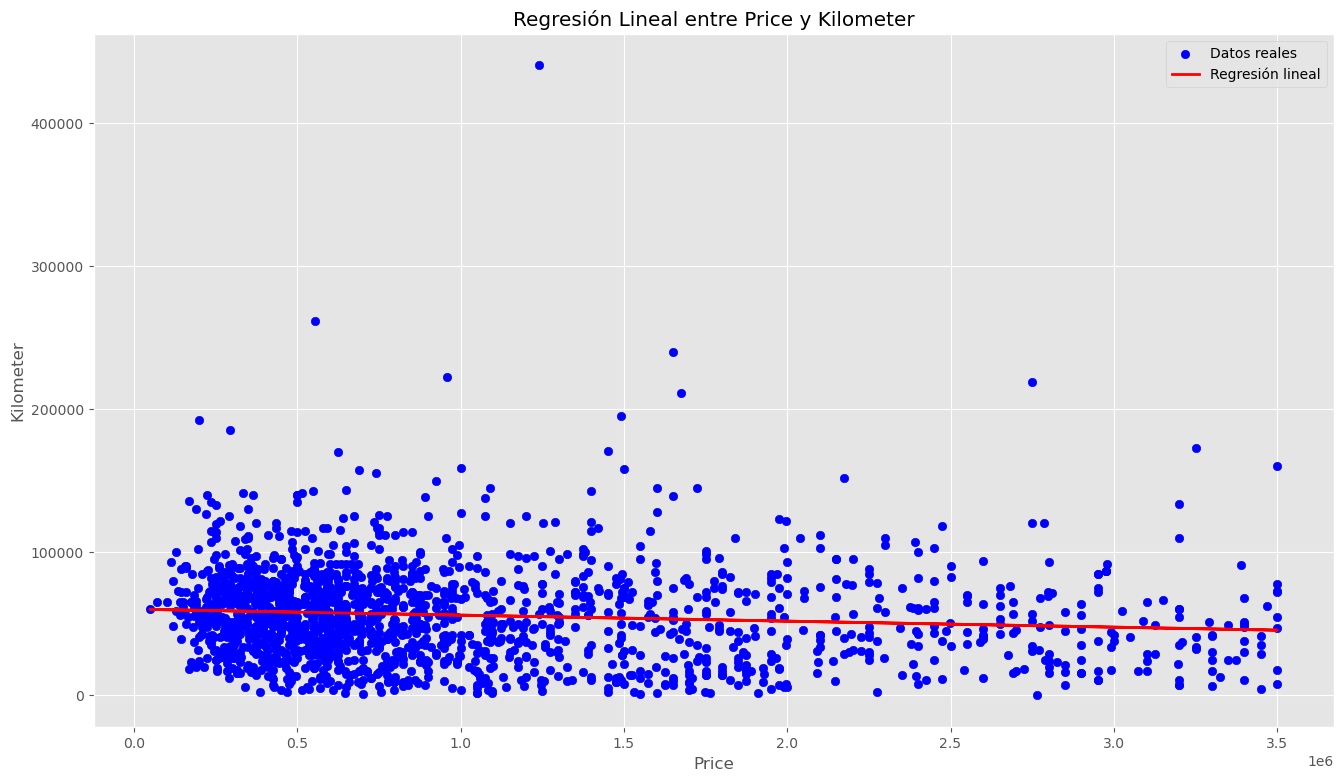

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = filtered_data[["Price"]]
X_train = np.array(dataX)
y_train = filtered_data["Kilometer"].values

# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones 
y_pred = regr.predict(X_train)

# Veamos los coeficientes obtenidos
print('Coefficients: \n', regr.coef_)
# Valor donde corta el eje Y (intercepto)
print('Independent term: \n', regr.intercept_)
# Error Cuadrático Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza (mejor valor es 1.0)
print('Variance score: %.2f' % r2_score(y_train, y_pred))

# Visualización de la regresión
plt.scatter(X_train, y_train, color='blue', label="Datos reales")
plt.plot(X_train, y_pred, color='red', linewidth=2, label="Regresión lineal")
plt.xlabel("Price")
plt.ylabel("Kilometer")
plt.title("Regresión Lineal entre Price y Kilometer")
plt.legend()
plt.show()


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente -0.00419423 y el término independiente “b” es 60192.42520530816. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno  Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora  Esto también se ve reflejado en el puntaje de Varianza que debería ser cercano a 0.01.
Visualicemos la Recta
Veamos la recta que obtuvimos:

Predicción en regresión lineal simple
Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre kilometros de 2000 precio

In [10]:
# Vamos a comprobar:
# Quiero predecir cuántos "Kilometers" tendrá un auto con un "Price" de 2000,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil[0]))  # Extraemos el primer elemento del array



60184



Nos devuelve una predicción de 60184



n nuestro caso, utilizaremos 2 “variables predictivas” para poder graficar en 3D, pero recordar que para mejores predicciones podemos utilizar más de 2 entradas y prescindir del grafico.

Nuestra primer variable seguirá siendo la cantidad de precio y la segunda variable será la suma de 2 columnas de entrada: kilometos ,enegine,max power.


In [13]:
import numpy as np
import pandas as pd

# Asegurar que no haya espacios en los nombres de las columnas
filtered_data.columns = filtered_data.columns.str.strip()

# Crear la variable 'suma' como la combinación de 'Engine' y 'Max Power'
suma = (filtered_data["Engine"] + filtered_data["Max Power"])

# Crear DataFrame con variables predictoras
dataX2 = pd.DataFrame({
    "Price": filtered_data["Price"],
    "suma": suma
})

# Convertir a NumPy arrays
XY_train = dataX2.values
z_train = filtered_data["Kilometer"].values  # Usamos 'Kilometer' como variable objetivo

print("Datos preparados correctamente.")
print(XY_train[:5])  # Mostrar las primeras 5 filas
print(z_train[:5])  # Mostrar las primeras 5 filas



Datos preparados correctamente.
[[505000 '1198 cc87 bhp @ 6000 rpm']
 [450000 '1248 cc74 bhp @ 4000 rpm']
 [220000 '1197 cc79 bhp @ 6000 rpm']
 [799000 '1197 cc82 bhp @ 6000 rpm']
 [1950000 '2393 cc148 bhp @ 3400 rpm']]
[87150 75000 67000 37500 69000]



Ya tenemos nuestras 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser “Y” a ser el eje “Z”.

Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos:


In [17]:
import numpy as np
import pandas as pd
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Función para extraer el primer número de una cadena
def extract_number(text):
    match = re.search(r'\d+\.?\d*', str(text))  # Buscar número en el texto
    return float(match.group()) if match else 0  # Convertir a float o devolver 0

# Datos de ejemplo (simulando 'filtered_data')
data = {
    "Price": [5000, 7000, 9000, 11000],
    "Engine": ["1198 cc", "1498 cc", "1399 cc", "1598 cc"],
    "Max Power": ["87 bhp @ 6000 rpm", "110 bhp @ 6500 rpm", "100 bhp @ 6200 rpm", "120 bhp @ 6800 rpm"],
    "Max Torque": ["109 Nm @ 4500 rpm", "140 Nm @ 4800 rpm", "130 Nm @ 4600 rpm", "150 Nm @ 5000 rpm"]
}

filtered_data = pd.DataFrame(data)

# Convertir columnas de texto a valores numéricos
filtered_data["Engine"] = filtered_data["Engine"].apply(extract_number)
filtered_data["Max Power"] = filtered_data["Max Power"].apply(extract_number)
filtered_data["Max Torque"] = filtered_data["Max Torque"].apply(extract_number)

# Crear matriz de variables independientes (predictoras)
dataX2 = pd.DataFrame()
dataX2["Price"] = filtered_data["Price"]
dataX2["Engine"] = filtered_data["Engine"]
XY_train = np.array(dataX2)

# Variable dependiente (lo que queremos predecir)
z_train = filtered_data["Max Power"].values.ravel()

# Crear y entrenar el modelo de regresión lineal
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

# Hacer predicción
z_pred = regr2.predict(XY_train)

# Resultados
print('Coefficients:', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))




Coefficients: [-0.00020841  0.08462149]
Mean squared error: 2.12
Variance score: 0.99


Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas), pues ahora lo que graficamos no será una linea si no, un plano en 2 Dimensiones.

El error obtenido sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 0.99).


Coefficients: 
 [1.00000000e+00 7.54741513e-16]
Mean squared error: 0.00
Variance score: 1.00


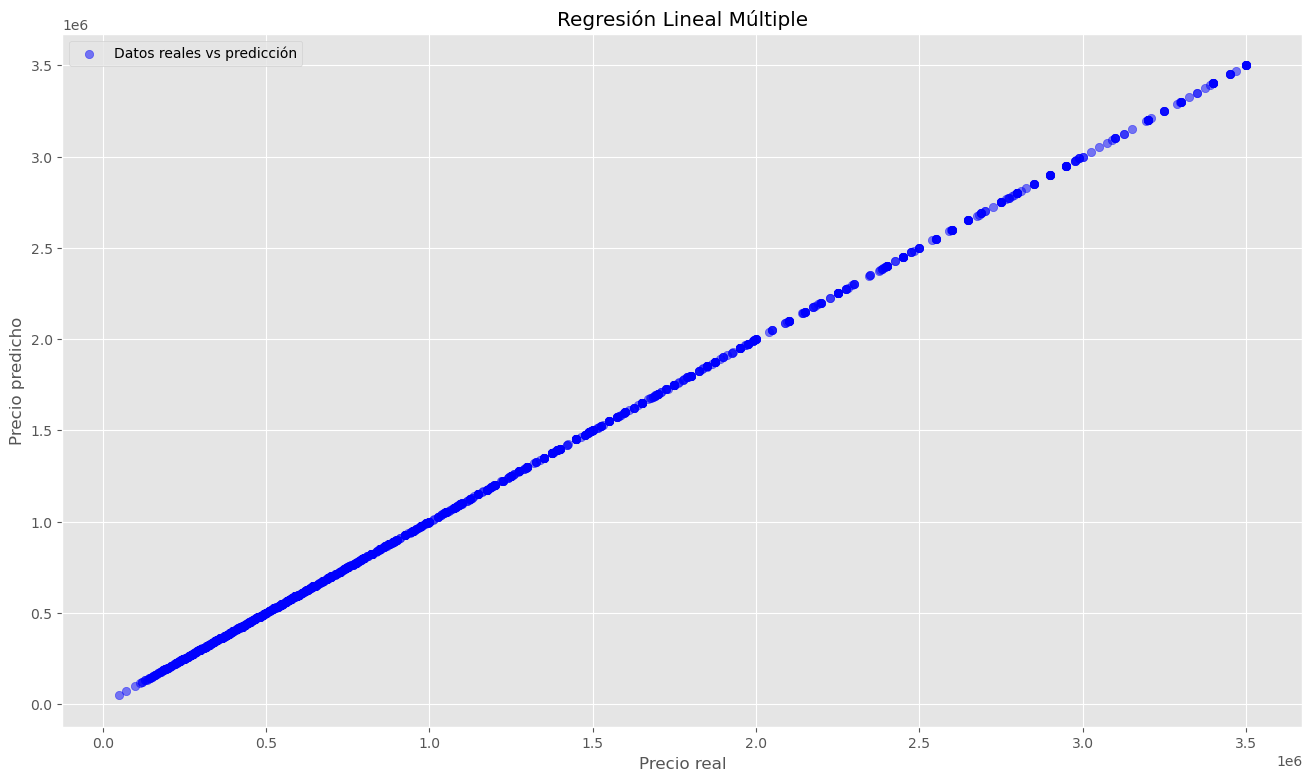

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Hacer una copia del DataFrame original para evitar SettingWithCopyWarning
filtered_data = filtered_data.copy()

# Función para extraer solo números de columnas con datos mixtos (ej: "1198 cc" → 1198)
def extract_number(value):
    if isinstance(value, str):
        numbers = ''.join([c for c in value if c.isdigit() or c == '.'])
        return float(numbers) if numbers else np.nan
    return value

# Aplicar la conversión a las columnas necesarias
filtered_data.loc[:, "Engine"] = filtered_data["Engine"].apply(extract_number)
filtered_data.loc[:, "Max Power"] = filtered_data["Max Power"].apply(extract_number)

# Asegurar que no haya valores nulos después de la conversión
filtered_data = filtered_data.dropna(subset=["Engine", "Max Power", "Price"])

# Crear una nueva variable 'suma' con la combinación de características
suma = filtered_data["Engine"] + filtered_data["Max Power"]

# Crear DataFrame con variables predictoras
dataX2 = pd.DataFrame({
    "Price": filtered_data["Price"],
    "suma": suma
})

# Convertir a NumPy arrays
XY_train = dataX2.values
z_train = filtered_data["Price"].values  # Variable objetivo

# Crear y entrenar el modelo de regresión lineal múltiple
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

# Hacer predicciones
z_pred = regr2.predict(XY_train)

# Mostrar resultados
print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
print('Variance score: %.2f' % r2_score(z_train, z_pred))

# Graficar los datos reales vs la predicción
plt.scatter(z_train, z_pred, color='blue', alpha=0.5, label="Datos reales vs predicción")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal Múltiple")
plt.legend()
plt.grid(True)
plt.show()



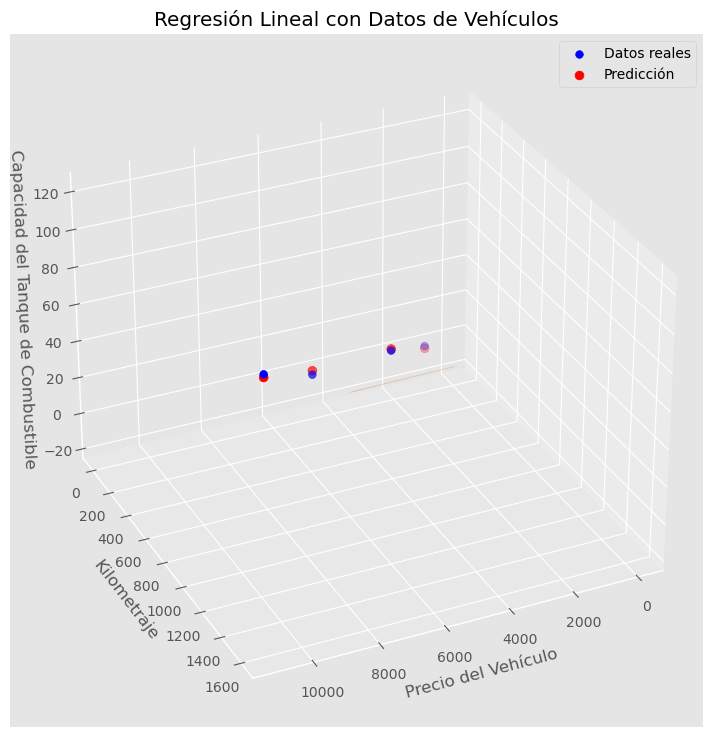

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creamos una malla para graficar el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# Calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# Calculamos los valores correspondientes para z
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos los puntos originales en azul
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30, label="Datos reales")

# Graficamos los puntos predichos en rojo
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40, label="Predicción")

# Configuración de la vista
ax.view_init(elev=30., azim=65)

# Etiquetas
ax.set_xlabel('Precio del Vehículo')
ax.set_ylabel('Kilometraje')
ax.set_zlabel('Capacidad del Tanque de Combustible')
ax.set_title('Regresión Lineal con Datos de Vehículos')

# Mostrar leyenda
ax.legend()

plt.show()


Visualizar un plano en 3 Dimensiones en Python
Graficaremos nuestros puntos de las características de entrada en color azul y los puntos proyectados en el plano en rojo. Recordemos que en esta gráfica, el eje Z corresponde a la “altura” y representa la cantidad de Shares que obtendremos.

In [ ]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

Esta predicción nos da 20518 y probablemente sea un poco mejor que nuestra predicción anterior con 1 variables.